In [1]:
import clean, residual, run
import numpy as np
import matplotlib.pylab as plt
import re
import csv
from tables import open_file
from statistics import median, mode
from scipy.optimize import curve_fit, minimize
from math import acos, degrees, log
from matplotlib.colors import LogNorm

In [2]:
import imp
imp.reload(residual)
imp.reload(clean)
imp.reload(run)

<module 'run' from '/Users/MatthewMan/Desktop/UofA/Attenuation, Absorption, & Scattering/Analysis/run.py'>

# ---------------------------------------------------
# sDOM5 MINOS 20V

In [191]:
filename = '20190313_170404_UTC_SDOM5_FLASH_MINOS1_P2_uv_both_2500Hz_20V_30s_19072170414.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 10.561528713292185


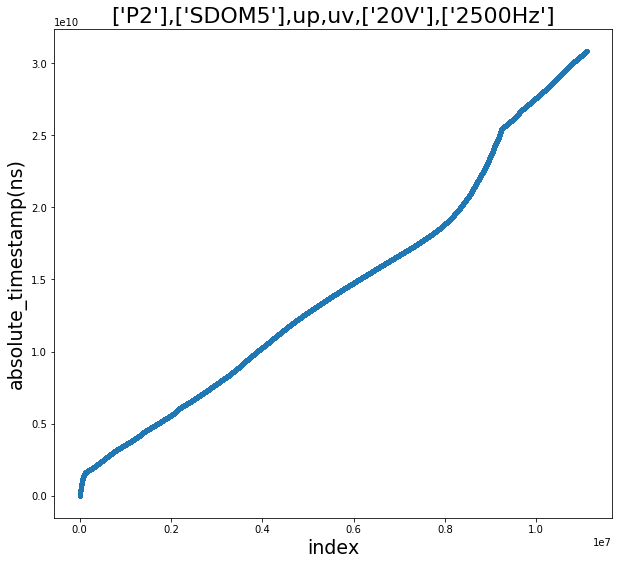

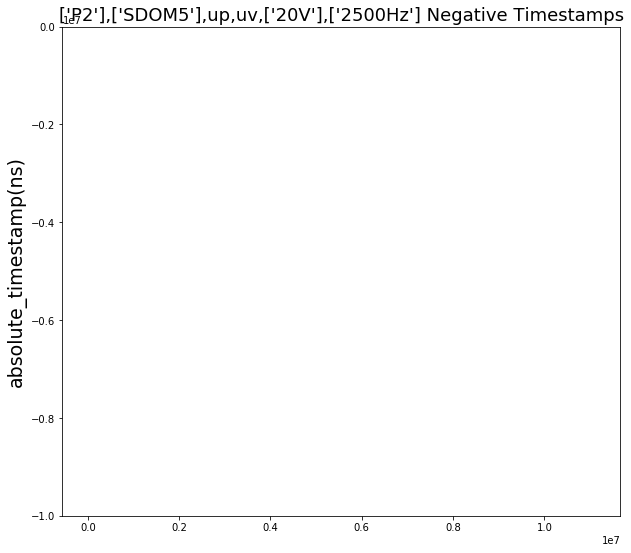

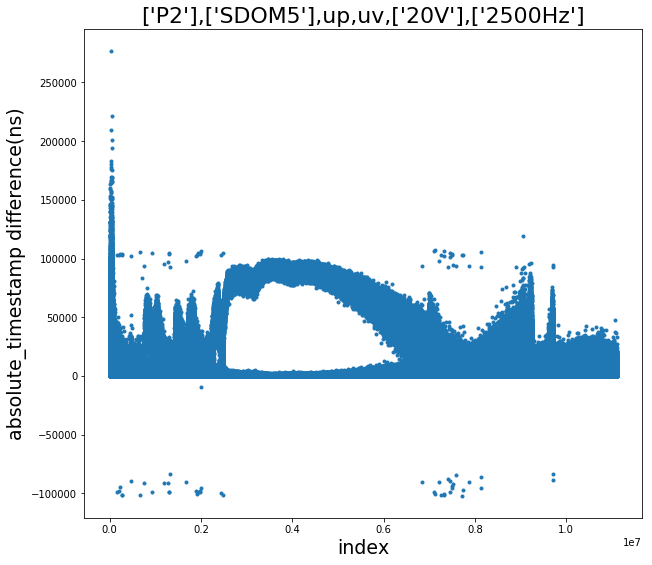

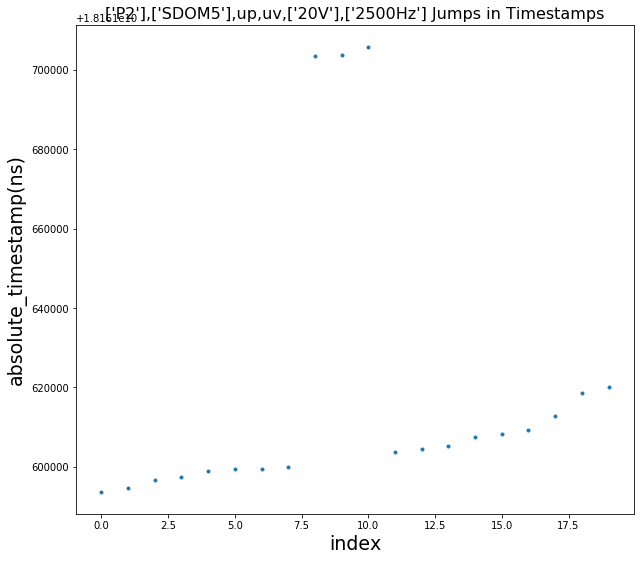

[ 173202.  208450.  230612.  230613.  230614.  230615.  230616.  273257.
  273258.  273259.  273260.  273261.  273314.  273315.  273316.  273317.
  273318.  273319.  273320.  459666.  459667.  459668.  658171.  753984.
  753985.  753986.  932688. 1193538. 1193539. 1193540. 1278485. 1278486.
 1278487. 1278488. 1290942. 1302353. 1302354. 1302355. 1327317. 1327318.
 1327319. 1678175. 1678176. 1678177. 1892676. 1892677. 1918530. 1918531.
 1918532. 1918533. 1943905. 1943906. 1943907. 1971268. 1971269. 1971270.
 1986938. 1998276. 1998277. 1998278. 1998279. 1998280. 1998281. 2006335.
 2430760. 2430761. 2430762. 2430763. 2430764. 2430765. 2478996. 2478997.
 2478998. 6851847. 6851848. 6851849. 6851850. 7100371. 7100372. 7100373.
 7100374. 7135541. 7135542. 7205382. 7205383. 7205384. 7252200. 7252201.
 7252202. 7330344. 7330345. 7330346. 7330347. 7333902. 7416142. 7416143.
 7416144. 7416145. 7416146. 7455649. 7455650. 7455651. 7455652. 7455653.
 7455654. 7455655. 7455656. 7455706. 7498743. 74987

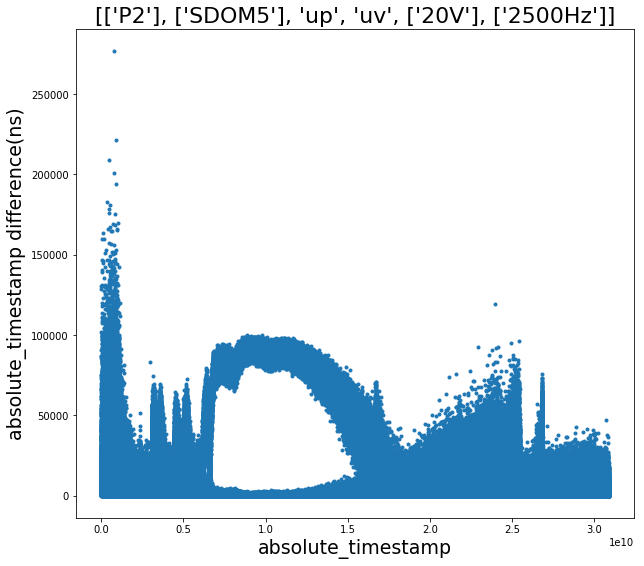

0.3431473152344834


In [64]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = a.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


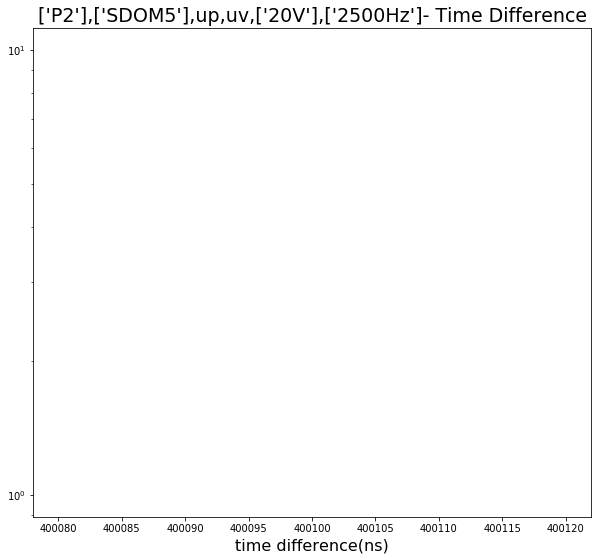

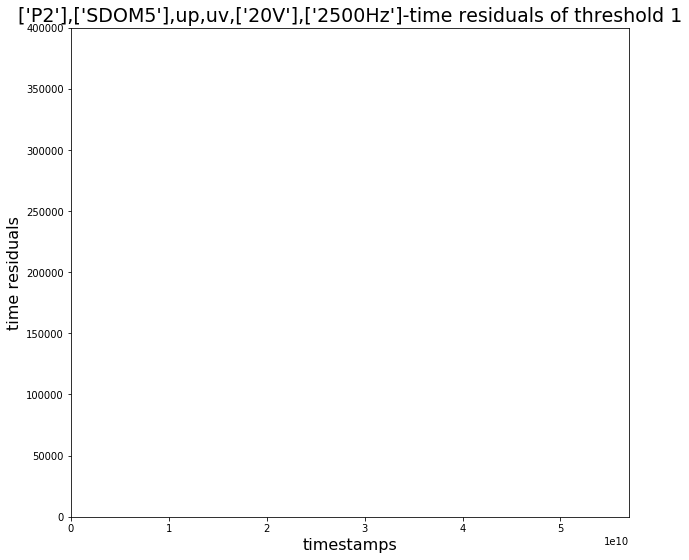

In [65]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

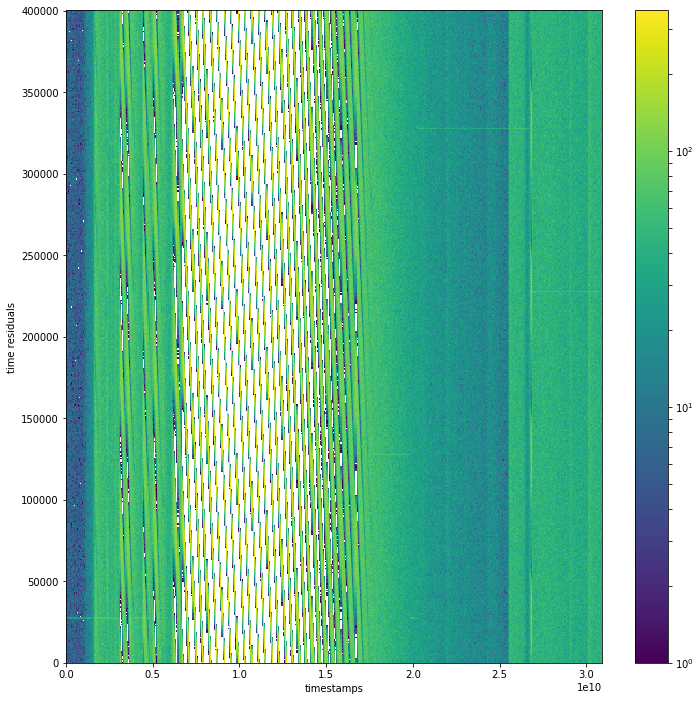

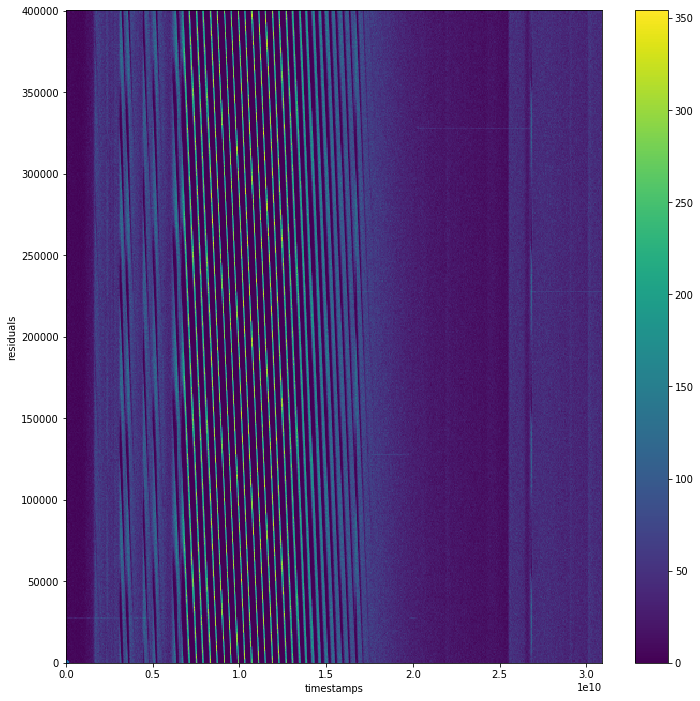

In [161]:
gaus_peak = 400100.7130668668#400100.7128609414 #400100.7130668668
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

0.6080948809144353


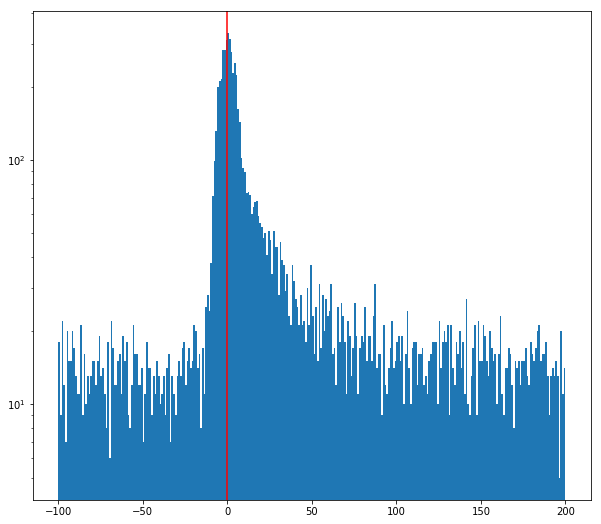

In [189]:
## POCAM signal (plot by eye)

time_window1 = (abs_elim_3<0.49e10)
#time_window2 = (abs_elim_3>.49e10) & (abs_elim_3<.65e10)
time_window3 = (abs_elim_3>1.7e10) & (abs_elim_3<2e10)
time_window4 = ((abs_elim_3>2e10) & (abs_elim_3<2.65e10)) 
time_window5 = (abs_elim_3>2.65e10)

my_data_all = np.array([])
weights_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
weights = r1.weights[time_window1]
my_res = (my_slice%gaus_peak) - 223260 + 145000+72-245000-4000+300+7+300000-500+10+8
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

#my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
#weights = r1.weights[time_window2]
#my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15+148000-500-175+46-50000
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window3]
weights = r1.weights[time_window3]
my_res = (my_slice%gaus_peak) - 223260-100000+89-200-15-123+48000-700+200-5+150000-1500+60
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window4]
weights = r1.weights[time_window4]
my_res = (my_slice%gaus_peak) -100000+89-500-15-123-275000-1750+50000-600+75+250+19
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window5] 
weights = r1.weights[time_window5]
my_res = (my_slice%gaus_peak) - 223260+1000-72+16-5500+250+10
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)


fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, weights=weights_all, range=(-100,200))
ax.axvline(color='r')
#ax.axvline(10,color='k')
#ax.axvline(-10,color='k')

# save to csv
path = 'Data/MINOS1/uv/Measured_arrival_times/'
filename = "['P2'],['SDOM5'],up,uv,['20V'],['2500Hz'].csv"
with open(path+filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bins[:-1])
    writer.writerow(n)
csvfile.close()

time_correction_4 = (0.49+.3+.65+(abs_elim_3[-1]/1e10-2.65))*1e10/(abs_elim_3[-1]-abs_elim_3[0])
print(time_correction_4)

In [192]:
sDOM5_MINOS_run = run.run()
run_time, err_run_time, dead_time_uncert = sDOM5_MINOS_run.run_time(atstamp, p_jumps, dt_mean, a.f_0,
                                                    a.f_1-a.r_1,
                                                    a.f_2-a.r_2,
                                                    a.f_3-a.r_3)

print('dead_time_uncert: ', dead_time_uncert, '%')

time removed(small jumps) -  404250.06436157227
timestamp of the last event -  30872099613.7327
eliminating high jumps and summing -  23025699671.178978
run time -  23025295421.114616
dead_time_uncert:  1.0639763145950287 %


In [154]:
## new minimizer function to determine gaus_peak
## gets around needing points in events_in_peak
## tested here, implemented in residual.py
# Input: timestamp range (without any res jumps). use HIST2D to visualize this
# Output: gaus_peak
# Method: maximize the peak of the arrival time distribution

def get_gaus_peak(timestamp_range):
    window = (abs_elim_3>timestamp_range[0]) & (abs_elim_3<timestamp_range[1])
    event_timestamps = (abs_elim_3+rising_1_elim_3)[window]
    
    
    def func_2_minimize(gaus_peak):
        residuals = event_timestamps%gaus_peak
        hist,bins = np.histogram(residuals,bins=80000) # bins is dependent on POCAM frequency
        max_index = np.argmax(hist)
        my_sum = np.sum(hist[max_index-2:max_index+3])
        return 1./my_sum
    
    result = minimize(func_2_minimize, [400100.72], method='Powell')
    gaus_peak_opt = result.x
    #print(result.message)
    return gaus_peak_opt


gaus_peak_opt = get_gaus_peak([2e10,2.65e10])
print(gaus_peak_opt)



Optimization terminated successfully.
400100.7128609414


In [153]:
a = np.array([0,1,5,12,20,18,14,9,7,4,2,1])
max_index = np.argmax(a)
print(a[max_index-2:max_index+3])

[ 5 12 20 18 14]


# ---------------------------------------------------
# sDOM5 HERA 20V

In [320]:
filename = '20190607_162244_UTC_SDOM5_FLASH_HERA1_P2_uv_both_2500Hz_20V_60s_19158162255.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 0.0


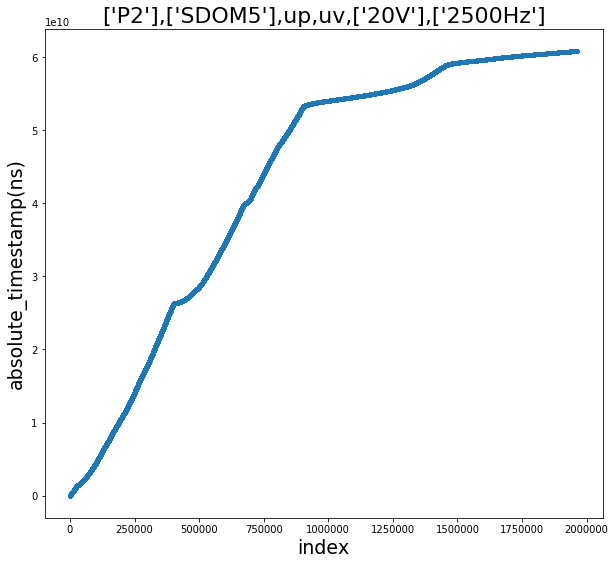

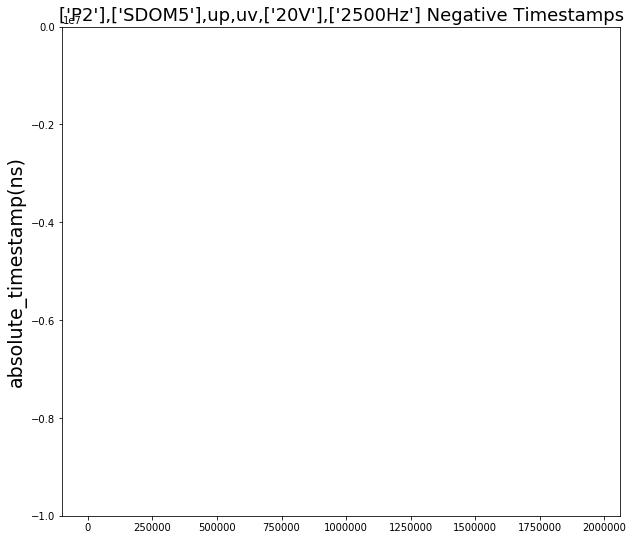

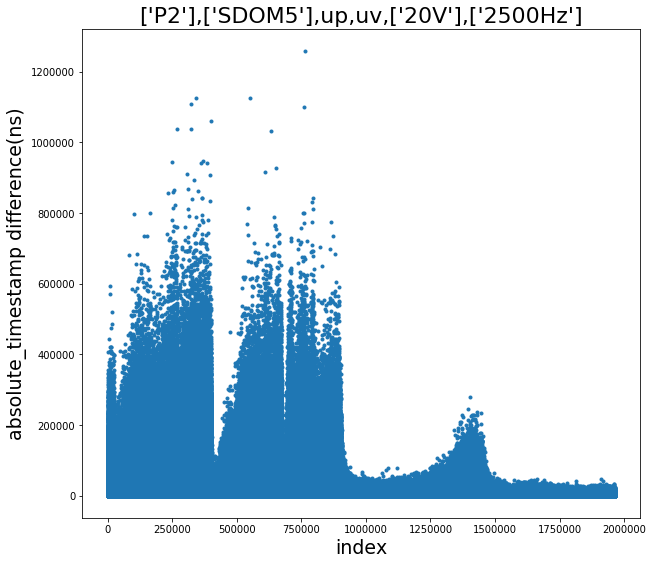

[]


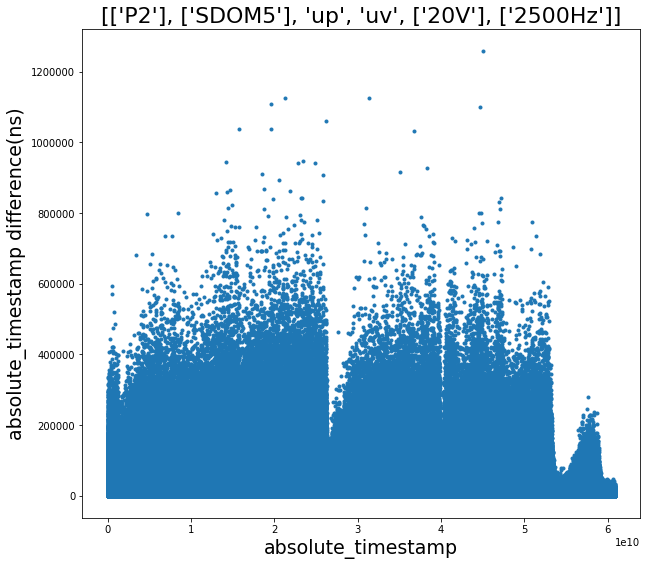

0.11674244729894172


In [321]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = a.P_S_used()

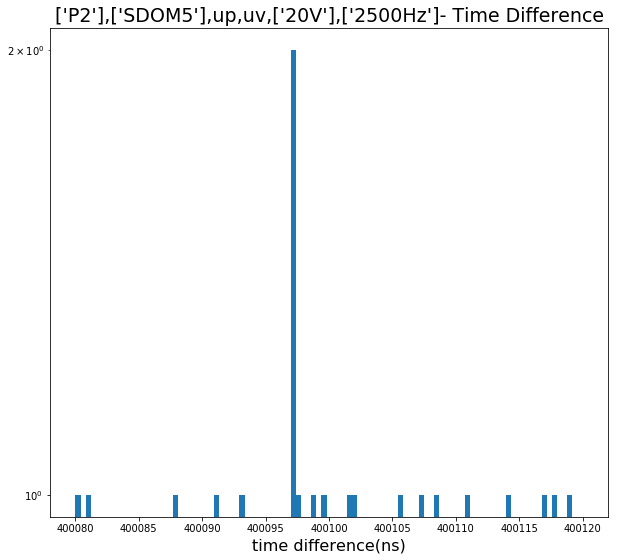

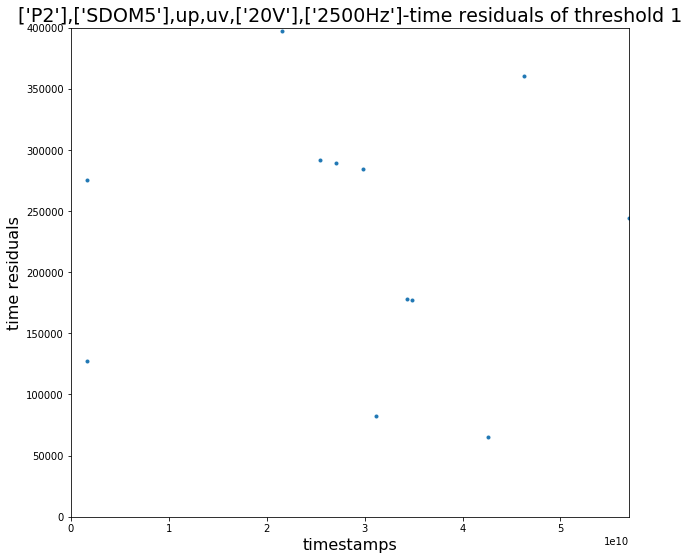

In [322]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

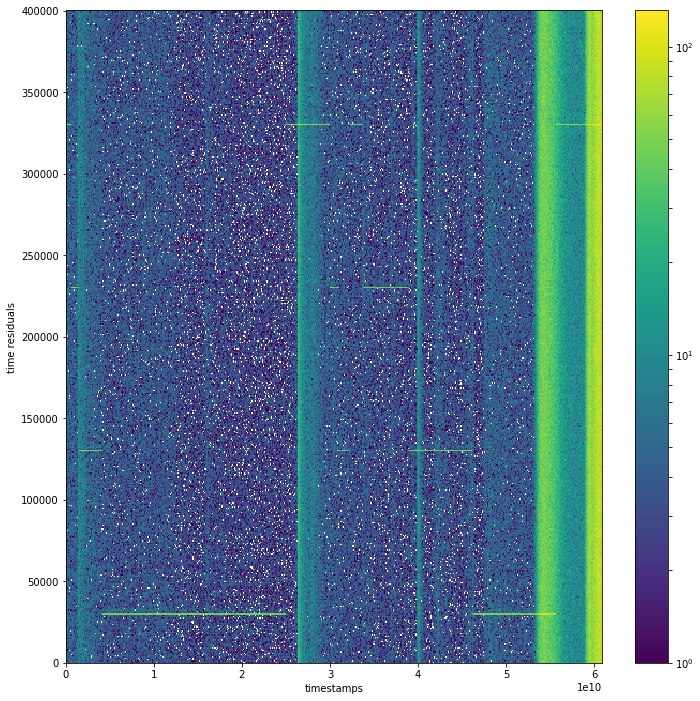

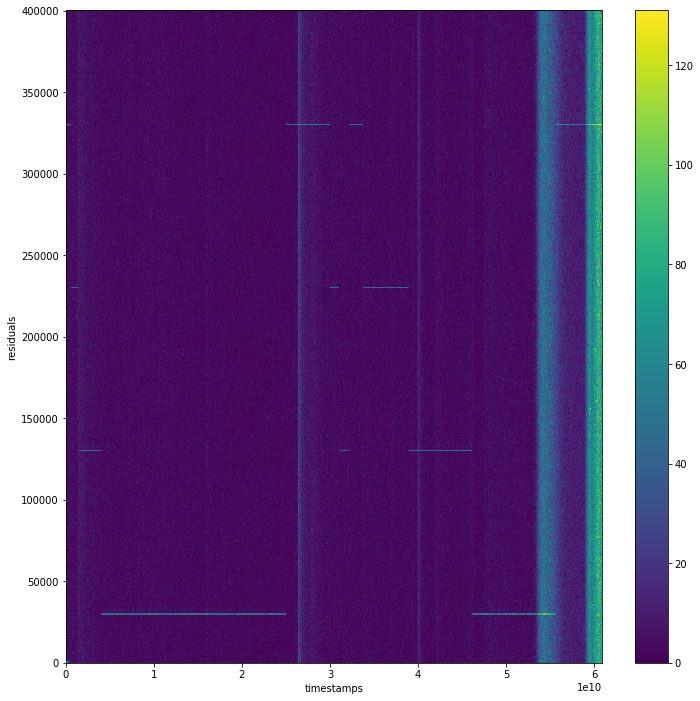

In [330]:
gaus_peak = 400100.7252620757#400100.71966755047
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


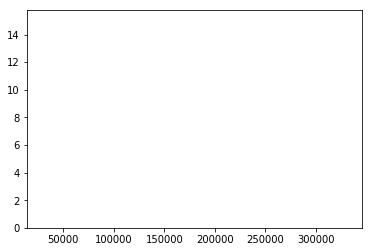

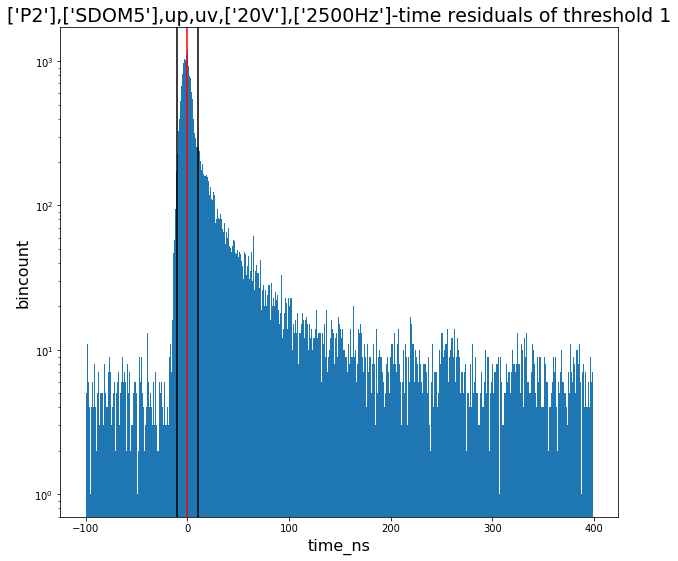

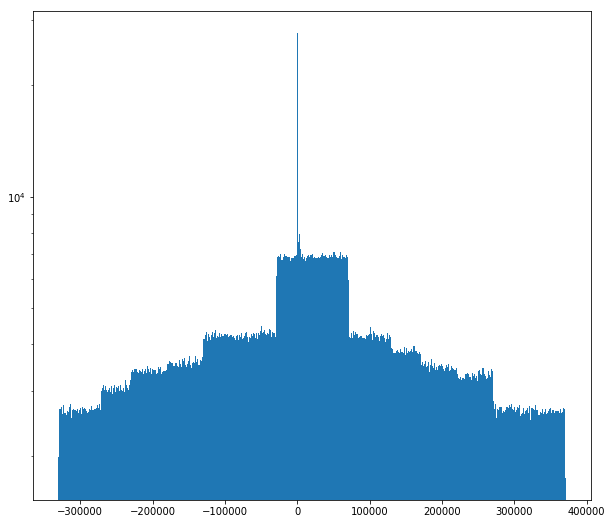

In [331]:
t_res_all1,num_events1, noise_events1 = r1.calc_res(BinsHist, 10, 2, 1,bin_size=1)

In [325]:
sDOM5_HERA_run = run.run()
run_time, err_run_time, dead_time_uncert = sDOM5_HERA_run.run_time(atstamp, p_jumps, dt_mean, a.f_0,
                                                    a.f_1-a.r_1,
                                                    a.f_2-a.r_2,
                                                    a.f_3-a.r_3)

print('dead_time_uncert: ', dead_time_uncert, '%')

timestamp of the last event -  60866294174.55664
eliminating high jumps and summing -  60860763055.52539
run time -  60860763055.52539
dead_time_uncert:  0.0 %


In [329]:
r1.GetGausPeak([.4e10,2.4e10])

400100.7252620757


array(400100.72526208)

# ---------------------------------------------------
# sDOM1 HERA 20V

In [264]:
filename = '20190607_162242_UTC_SDOM1_FLASH_HERA1_P2_uv_both_2500Hz_20V_60s_19158162252.hld_up.hdf5'
b = clean.clean(filename)

percentage of high jumps in the file - 17.97425073224534


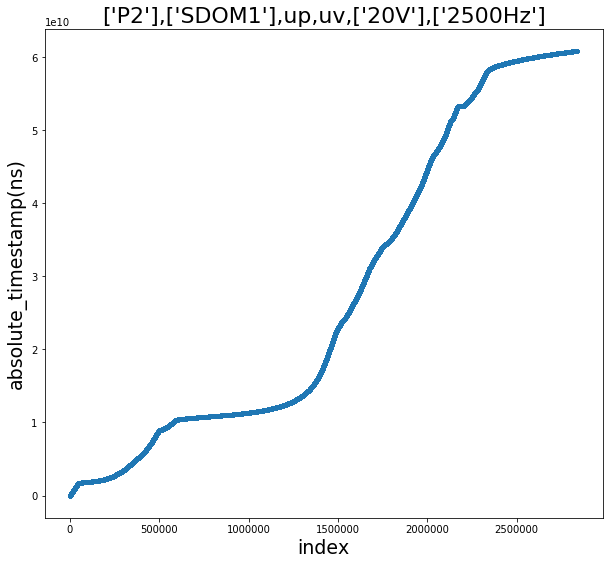

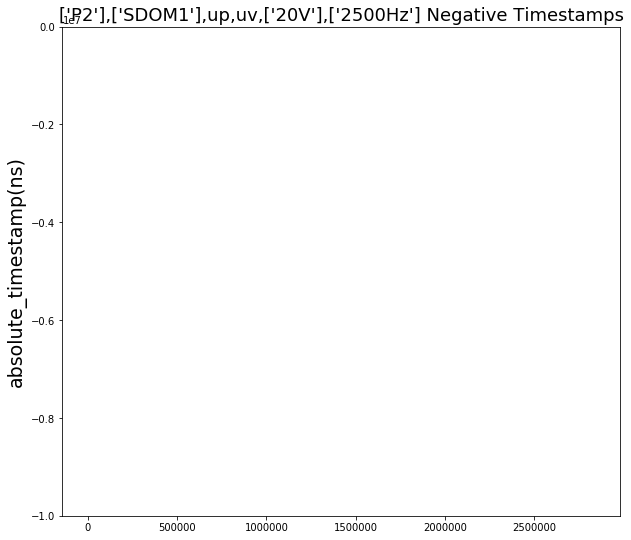

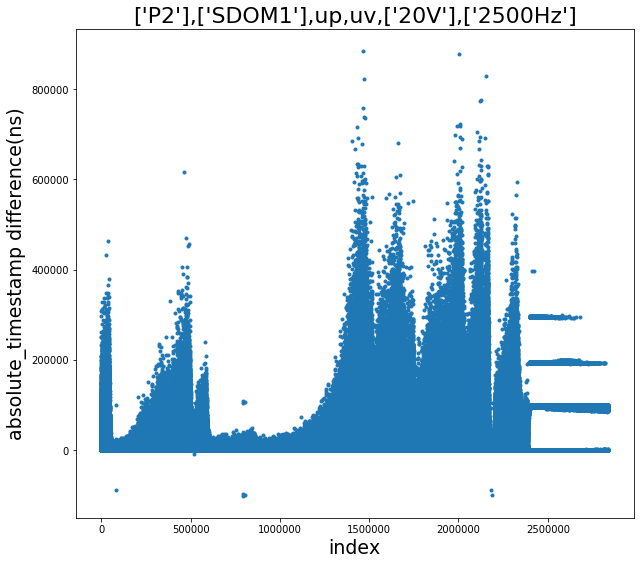

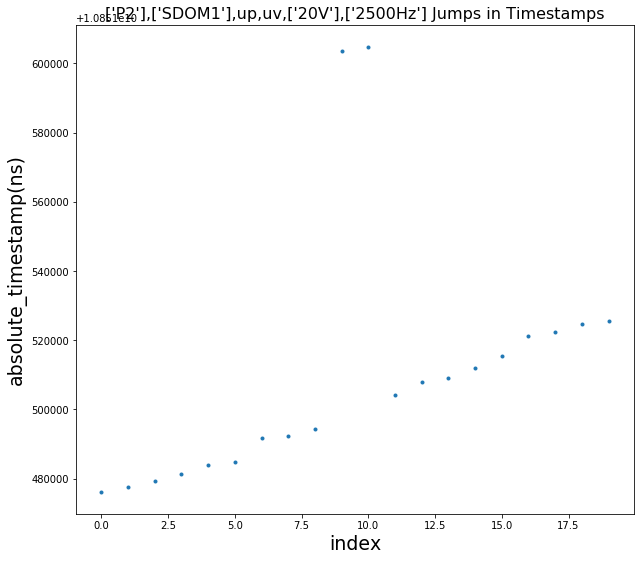

[  84434.  517145.  517146.  793243.  793244.  795667.  803492.  803493.
 2183206. 2183207. 2183208. 2183209. 2183210. 2183211. 2189801. 2189802.]


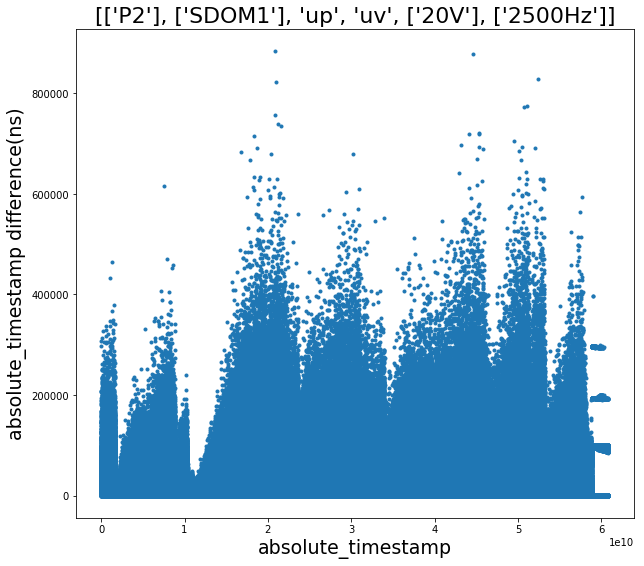

0.41497151005211363


In [265]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = b.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


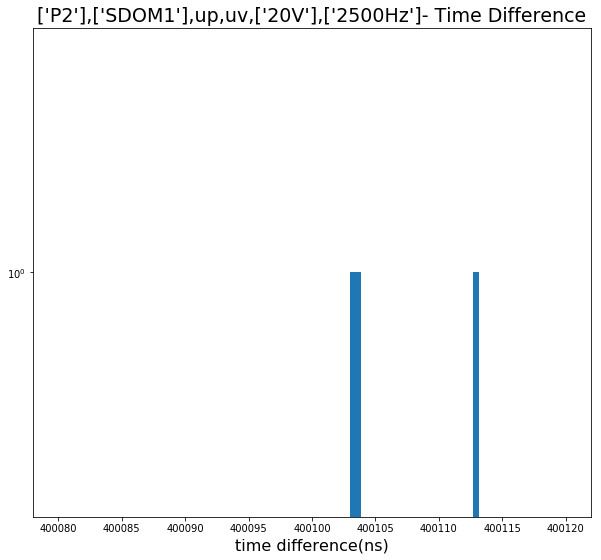

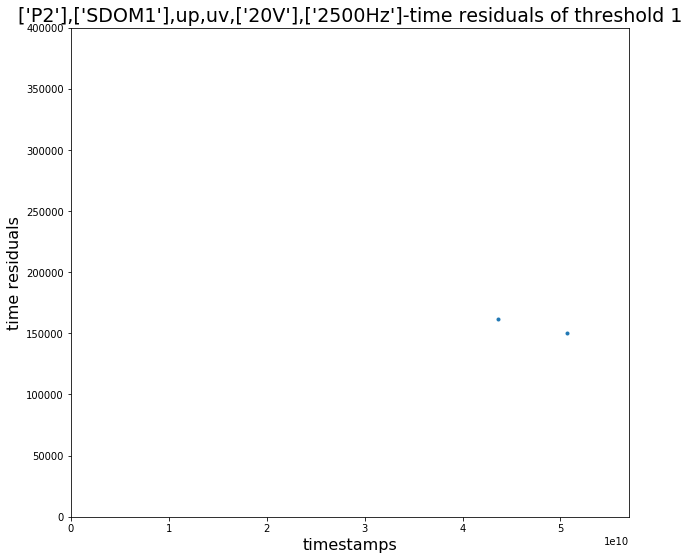

In [266]:
r2 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

400100.7314754535


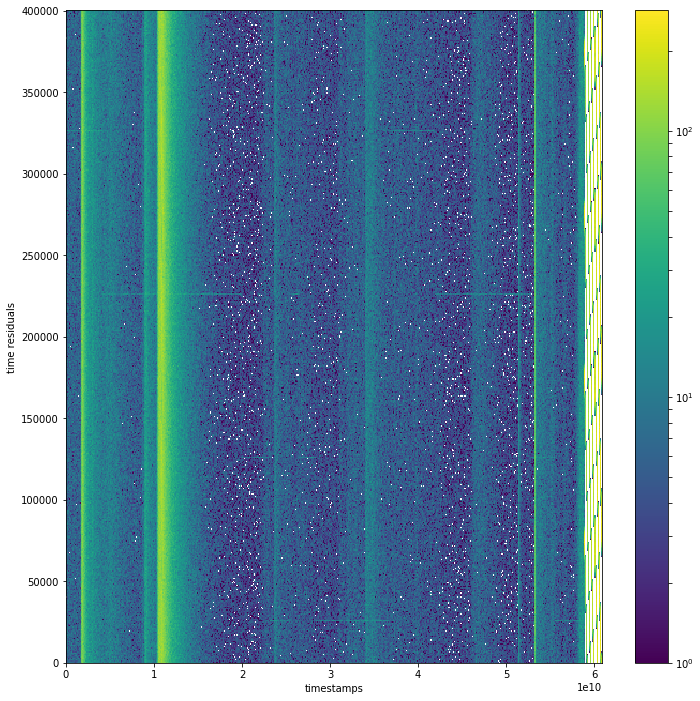

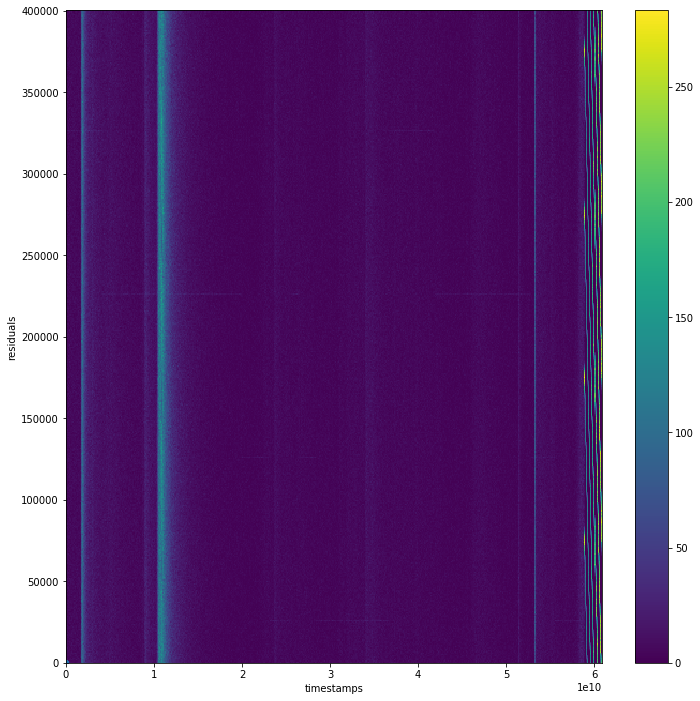

In [278]:
gaus_peak = r2.GetGausPeak([.35e10,2e10])
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r2.HIST2D(500, gaus_peak, SDOM_num)

0.7311355630082805


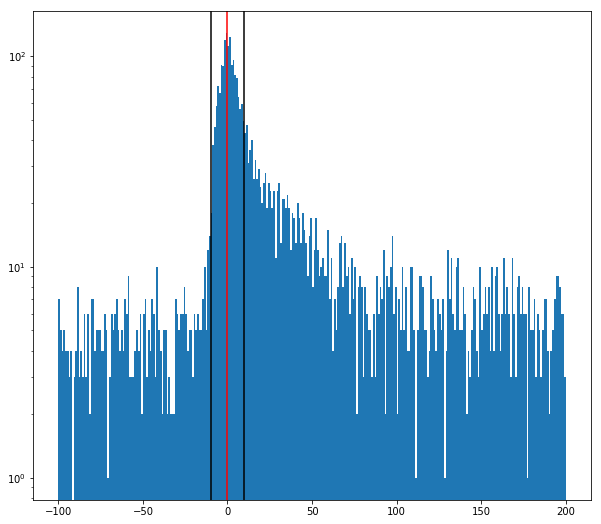

In [318]:
## POCAM signal (plot by eye)

time_window1 = (abs_elim_3<0.35e10)
time_window2 = (abs_elim_3>.35e10) & (abs_elim_3<2e10)
time_window3 = (abs_elim_3>2e10) & (abs_elim_3<2.25e10)
time_window4 = ((abs_elim_3>2.9e10) & (abs_elim_3<3.6e10)) 
time_window5 = ((abs_elim_3>3.7e10) & (abs_elim_3<4.2e10))
time_window6 = ((abs_elim_3>4.2e10) & (abs_elim_3<5.2e10))

my_data_all = np.array([])
weights_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
weights = r2.weights[time_window1]
my_res = (my_slice%gaus_peak) - 223260-100000-2600+40-5
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
weights = r2.weights[time_window2]
my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15+148000-175+46-50000-6
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window3]
weights = r2.weights[time_window3]
my_res = (my_slice%gaus_peak) - 223260-100000+48000+150000-600+45-2
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window4]
weights = r2.weights[time_window4]
my_res = (my_slice%gaus_peak) -100000-275000-1750+351000-190+15
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window5] 
weights = r2.weights[time_window5]
my_res = (my_slice%gaus_peak) - 223260+145000-250000+2400-172
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window6]
weights = r2.weights[time_window6]
my_res = (my_slice%gaus_peak) +50000+89-500-15-123-275000-1750-120+1500-122
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, weights=weights_all, range=(-100,200))
ax.axvline(color='r')
ax.axvline(10,color='k')
ax.axvline(-10,color='k')

# save to csv
path = 'Data/HERA1/uv/Measured_arrival_times/'
filename = "['P2'],['SDOM1'],up,uv,['20V'],['2500Hz'].csv"
with open(path+filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bins[:-1])
    writer.writerow(n)
csvfile.close()

time_correction_4 = (2.25+.7+.5+1)*1e10/(abs_elim_3[-1]-abs_elim_3[0])
print(time_correction_4)

In [319]:
sDOM1_HERA_run = run.run()
run_time, err_run_time, dead_time_uncert = sDOM1_HERA_run.run_time(atstamp, p_jumps, dt_mean, b.f_0,
                                                    b.f_1-b.r_1,
                                                    b.f_2-b.r_2,
                                                    b.f_3-b.r_3)

print('dead_time_uncert: ', dead_time_uncert, '%')

time removed(small jumps) -  64278.8666703701
timestamp of the last event -  60865899806.22942
eliminating high jumps and summing -  58906338867.71947
run time -  58906274588.8528
dead_time_uncert:  0.6057809780986867 %


In [326]:
0.7311355630082805*58906274588.8528/60000000000

0.717807870604021

# ---------------------------------------------------
# sDOM1 MINOS 20V

In [3]:
filename = '20190313_170402_UTC_SDOM1_FLASH_MINOS1_P2_uv_both_2500Hz_20V_30s_19072170412.hld_up.hdf5'
b = clean.clean(filename)

percentage of high jumps in the file - 8.90267130502478


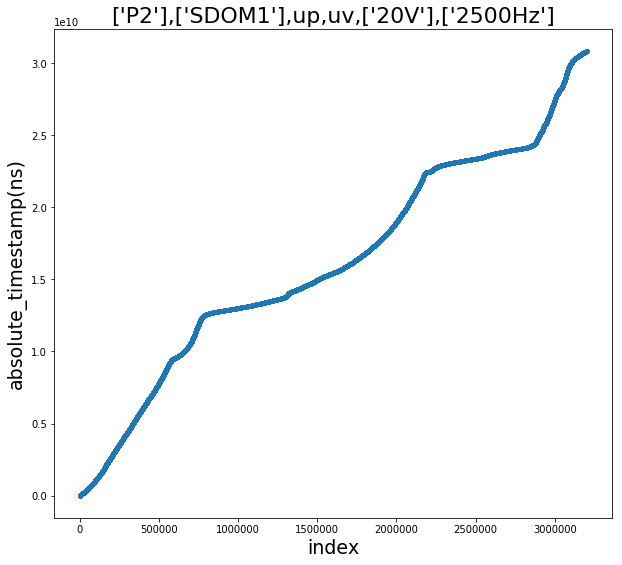

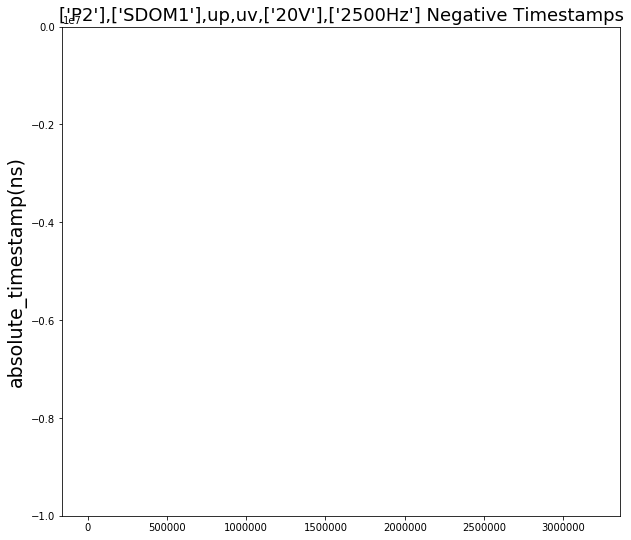

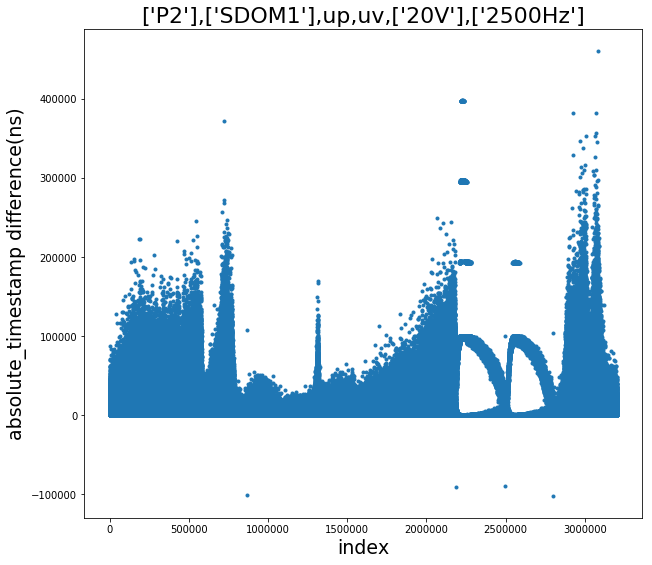

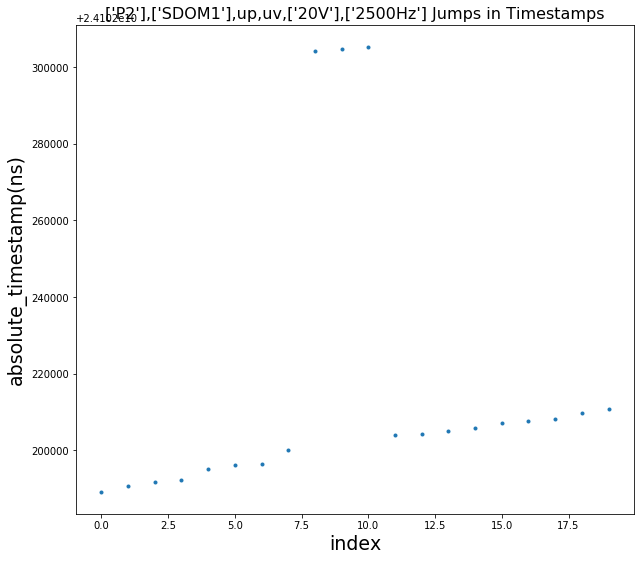

[ 866645.  866646. 2185527. 2185528. 2185529. 2185530. 2185531. 2185532.
 2185533. 2185534. 2185535. 2494146. 2796613. 2796614. 2796615.]


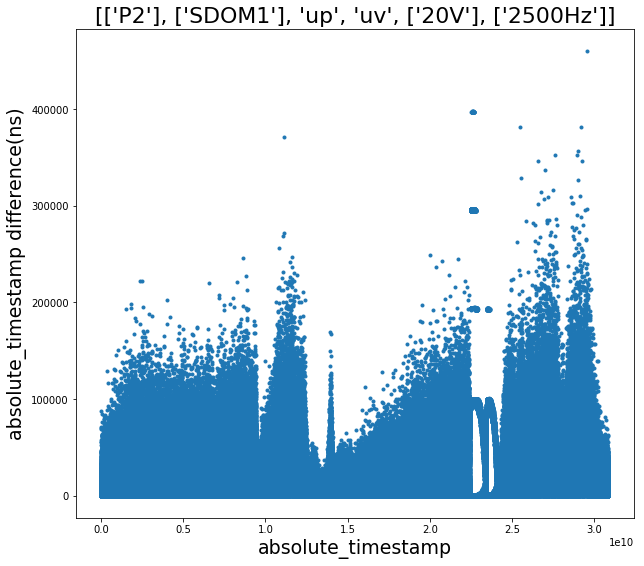

0.22495758175295363


In [4]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = b.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


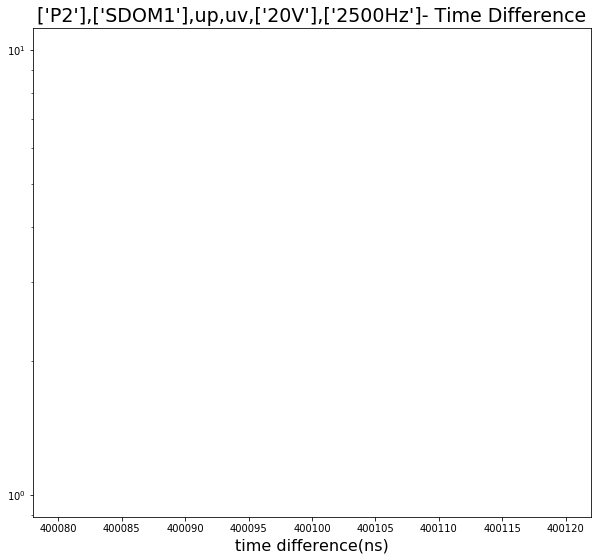

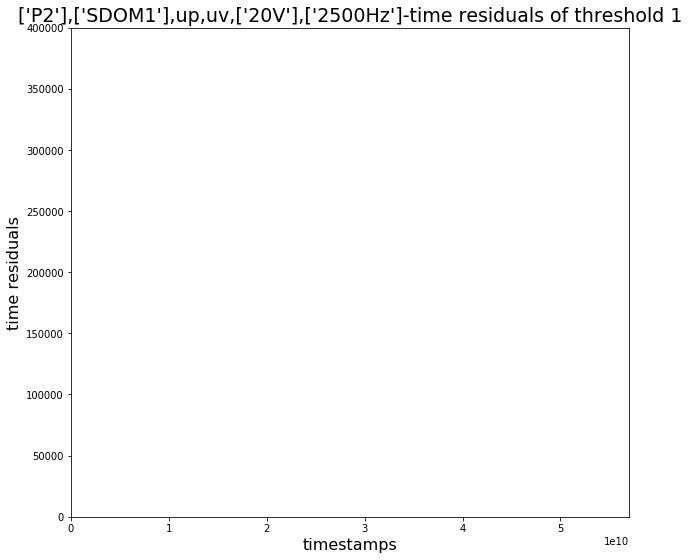

In [5]:
r2 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

400100.7187306566


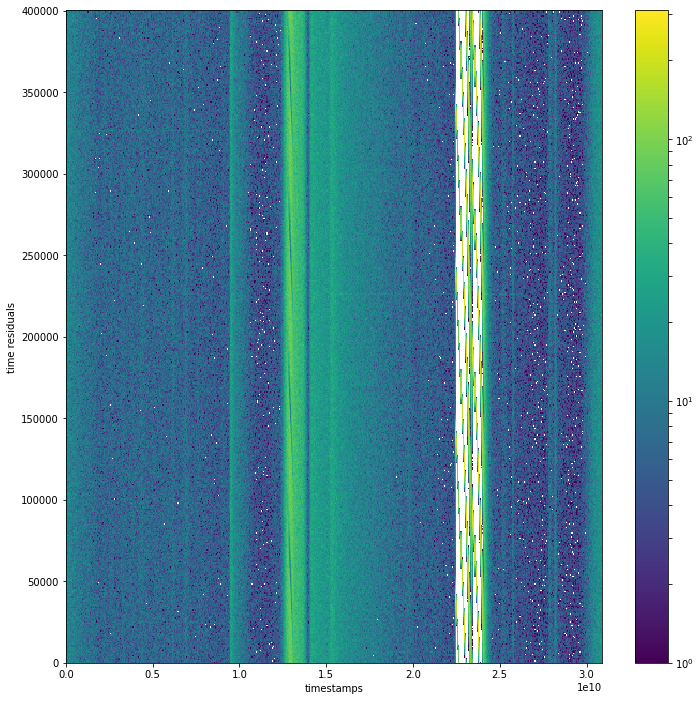

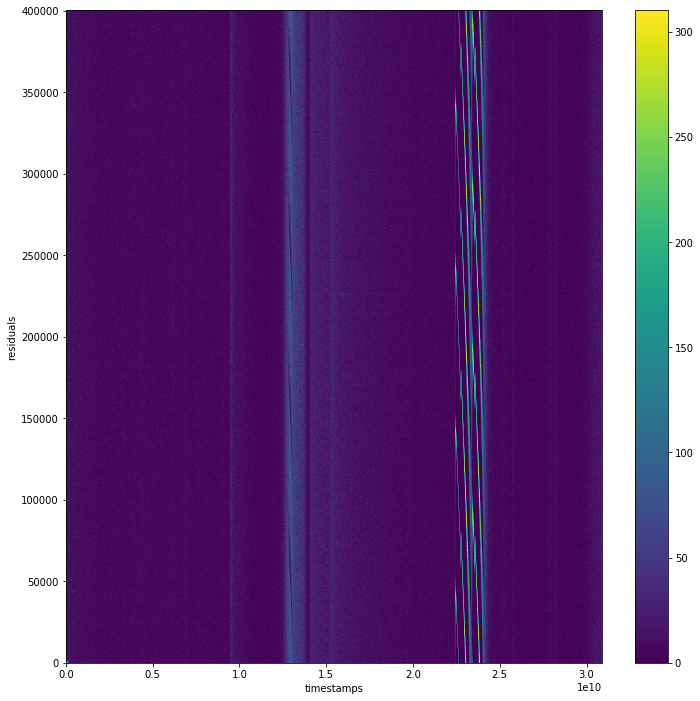

In [19]:
gaus_peak = r2.GetGausPeak([1.6e10,2.2e10])
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r2.HIST2D(500, gaus_peak, SDOM_num)

0.7290489109472654


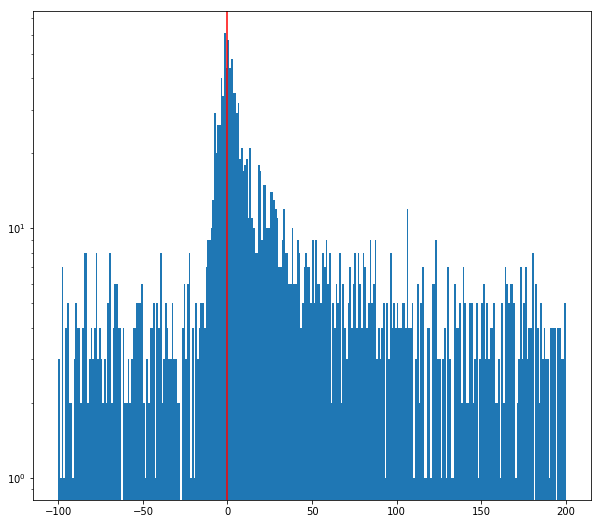

In [47]:
## POCAM signal (plot by eye)

time_window1 = (abs_elim_3<1.2e10)
time_window2 = (abs_elim_3>1.6e10) & (abs_elim_3<2.2e10)
time_window3 = (abs_elim_3>2.7e10)

gaus_peak = 400100.7191806566 #400100.719348873

my_data_all = np.array([])
weights_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
weights = r2.weights[time_window1]
my_res = (my_slice%gaus_peak) - 325000-1500+379
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
weights = r2.weights[time_window2]
my_res = (my_slice%gaus_peak)-225000-1000-119
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window3]
weights = r2.weights[time_window3]
my_res = (my_slice%gaus_peak) - 126000-122
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)


fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, weights=weights_all, range=(-100,200))
ax.axvline(color='r')
#ax.axvline(10,color='k')
#ax.axvline(-10,color='k')

# save to csv
path = 'Data/MINOS1/uv/Measured_arrival_times/'
filename = "['P2'],['SDOM1'],up,uv,['20V'],['2500Hz'].csv"
with open(path+filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bins[:-1])
    writer.writerow(n)
csvfile.close()

time_correction_4 = (1.2+.6+(abs_elim_3[-1]/1e10-2.7))/3
print(time_correction_4)

In [227]:
sDOM1_MINOS_run = run.run()
run_time, err_run_time, dead_time_uncert = sDOM1_MINOS_run.run_time(atstamp, p_jumps, dt_mean, b.f_0,
                                                    b.f_1-b.r_1,
                                                    b.f_2-b.r_2,
                                                    b.f_3-b.r_3)

print('dead_time_uncert: ', dead_time_uncert, '%')

time removed(small jumps) -  33407.18188858032
timestamp of the last event -  30871467328.41797
eliminating high jumps and summing -  29564618340.260933
run time -  29564584933.079044
dead_time_uncert:  0.5075832685674216 %


# ---------------------------------------------------
# sDOM2 MINOS 20V - signal not found

In [242]:
filename = '20190313_170403_UTC_SDOM2_FLASH_MINOS1_P2_uv_both_2500Hz_20V_30s_19072170413.hld_up.hdf5'
c = clean.clean(filename)

percentage of high jumps in the file - 0.8334278197245933


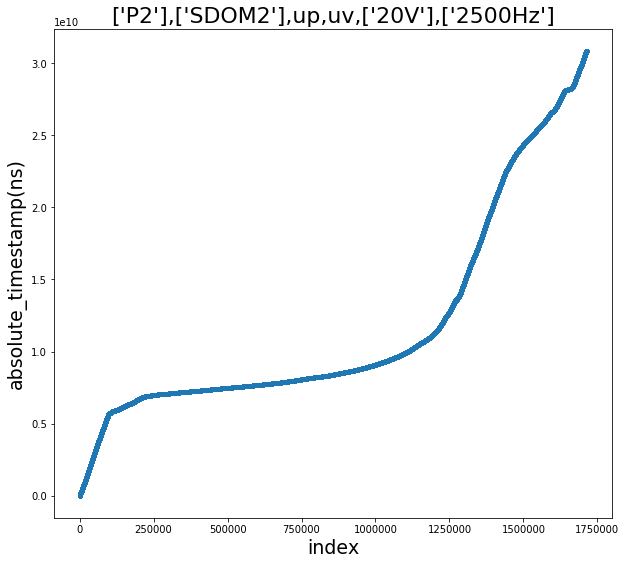

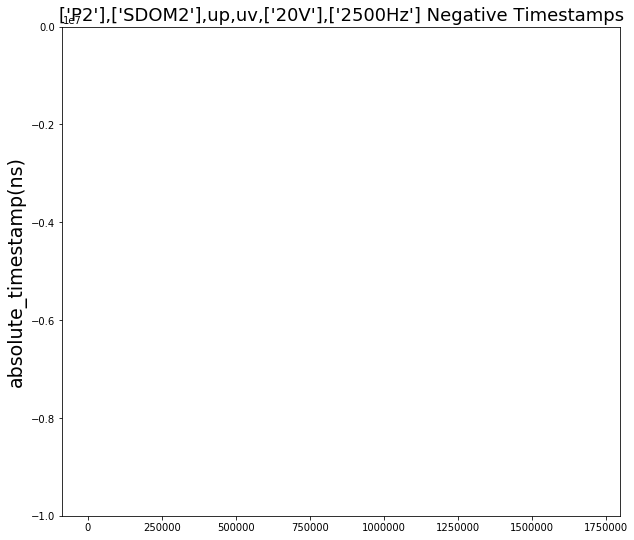

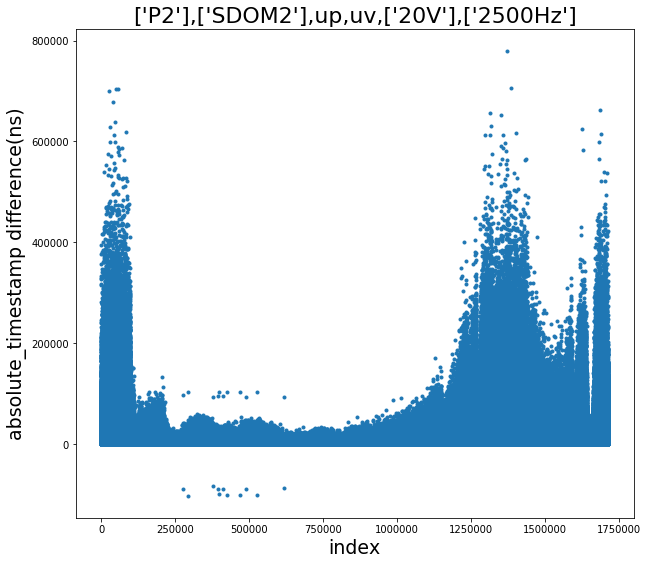

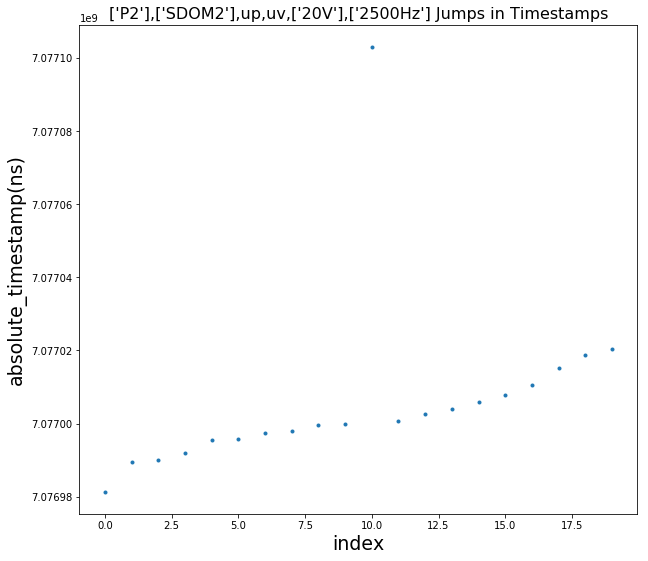

[277651. 277652. 277653. 277654. 277655. 277656. 294930. 376703. 376704.
 376705. 376706. 394626. 394627. 394628. 394629. 394630. 394631. 394632.
 396711. 396712. 396713. 411253. 411254. 411255. 411256. 426724. 468044.
 468045. 468046. 468047. 488842. 488843. 488844. 488845. 488846. 488847.
 488848. 525688. 525689. 525690. 616613. 616614. 616615. 616616. 616617.
 616618. 616619. 616620.]


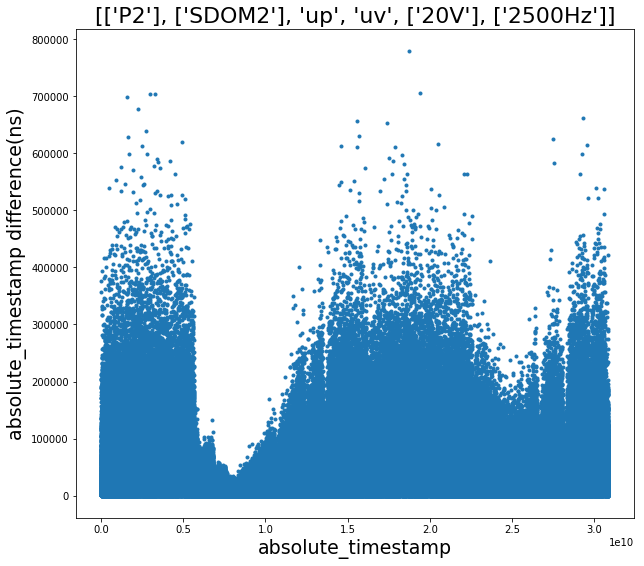

0.09219845732536888


In [243]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = c.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


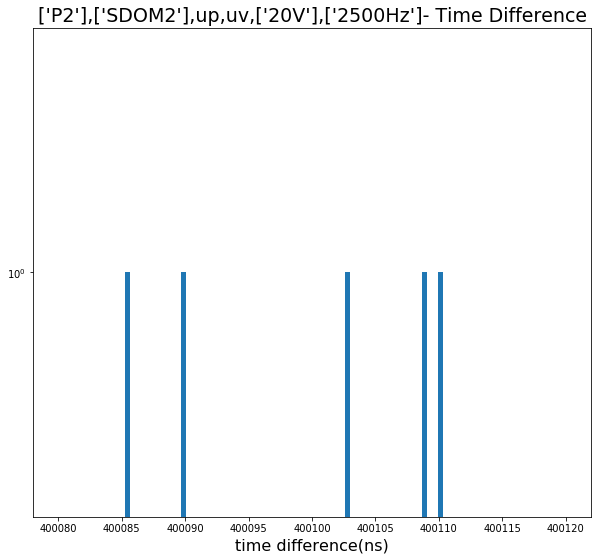

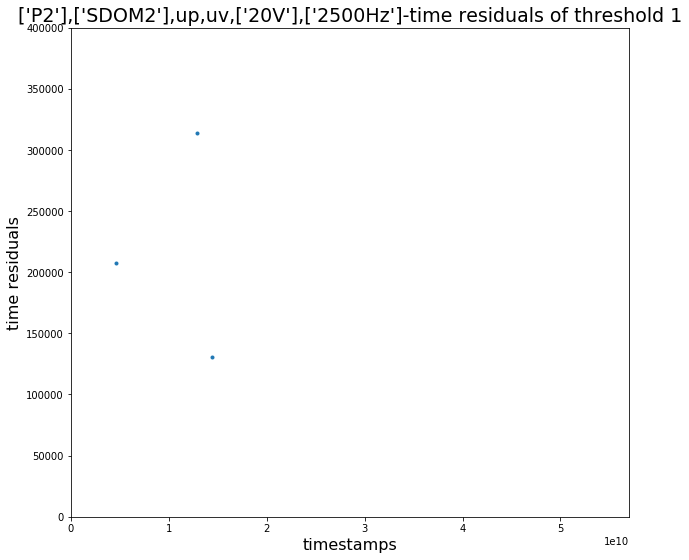

In [244]:
r3 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

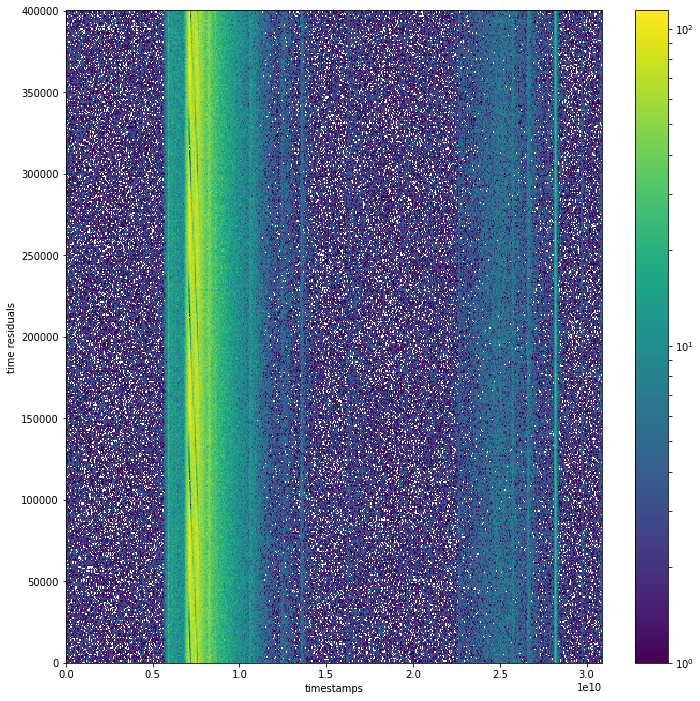

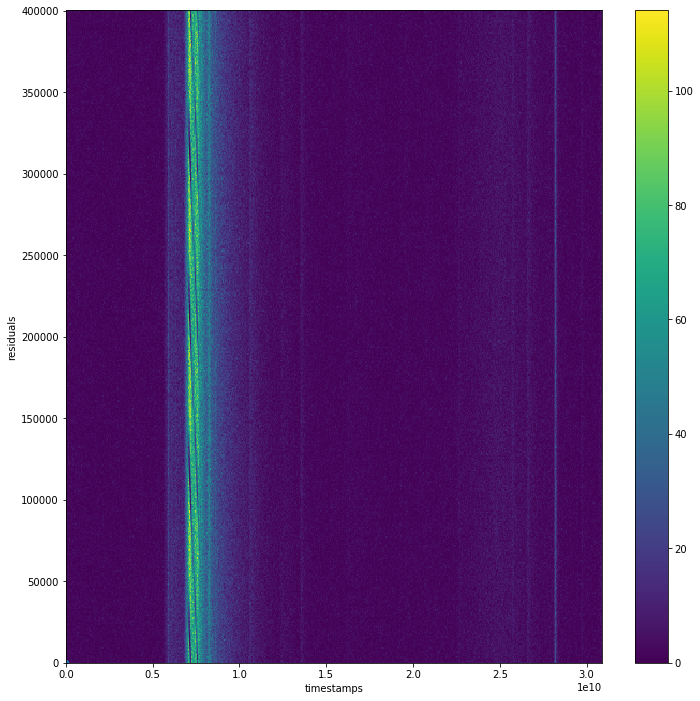

In [246]:
gaus_peak = 400100.719348873
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r3.HIST2D(500, gaus_peak, SDOM_num)

In [249]:
gaus_peak = r3.GetGausPeak([0.0e10,3.0e10])

400101.00866476214


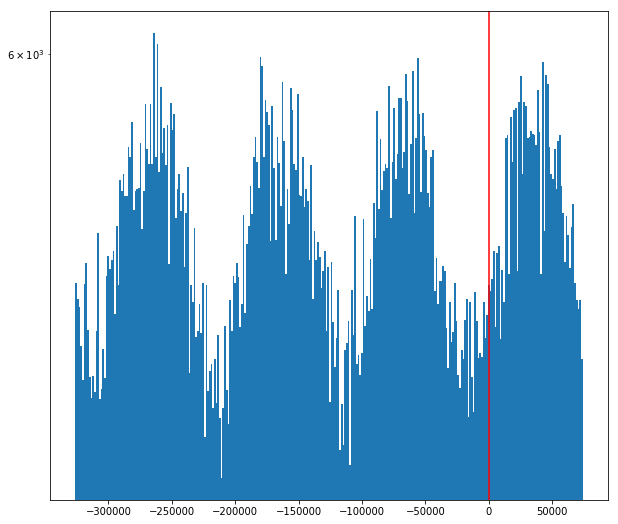

In [250]:
my_slice = abs_elim_3+rising_1_elim_3
weights = r3.weights
my_res = (my_slice%gaus_peak) - 325000-1500+370+10+3


fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_res,bins=300,log=True, weights=weights)#, range=(-100,200))
ax.axvline(color='r')
#ax.axvline(10,color='k')
#ax.axvline(-10,color='k')

# ---------------------------------------------------
# sDOM2 HERA 20V - signal not found

In [252]:
filename = '20190607_162243_UTC_SDOM2_FLASH_HERA1_P2_uv_both_2500Hz_20V_60s_19158162253.hld_up.hdf5'
c = clean.clean(filename)

percentage of high jumps in the file - 4.161569000256395


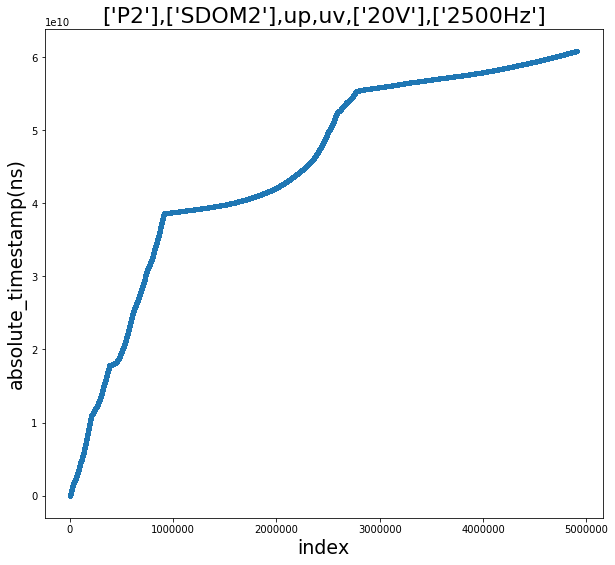

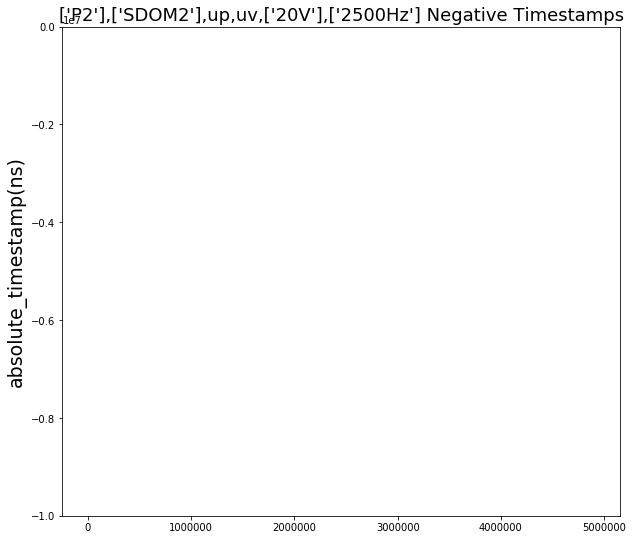

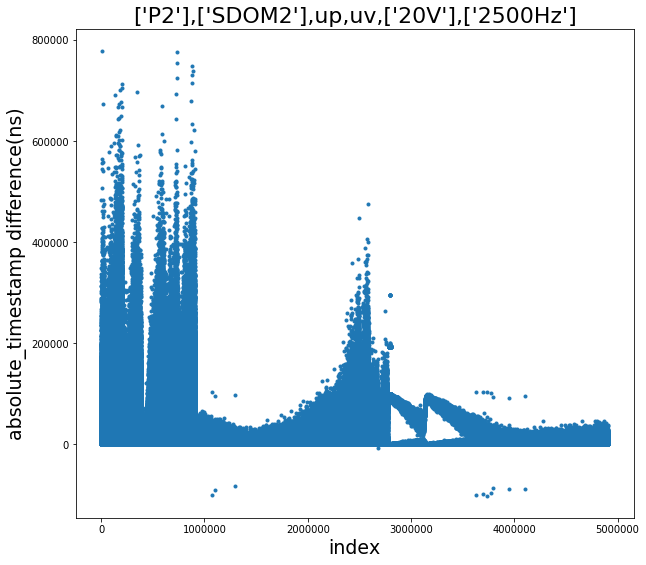

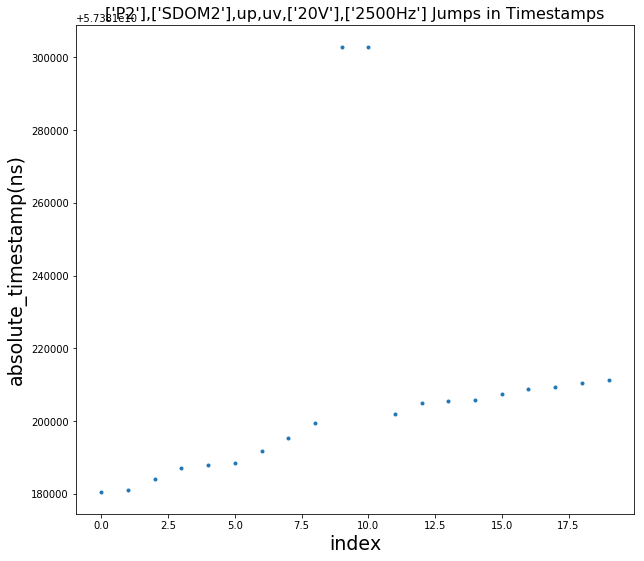

[1068700. 1068701. 1100876. 1100877. 1100878. 1100879. 1100880. 1100881.
 1294753. 2682184. 2682185. 2682186. 2682187. 2682188. 2682189. 3632573.
 3694606. 3694607. 3694608. 3694609. 3694610. 3738084. 3738085. 3771069.
 3771070. 3771071. 3771072. 3771073. 3771074. 3771075. 3791714. 3791715.
 3791716. 3791717. 3949786. 3949787. 3949788. 3949789. 3949790. 4099365.
 4099366. 4099367. 4099368. 4099369. 4099370. 4099371.]


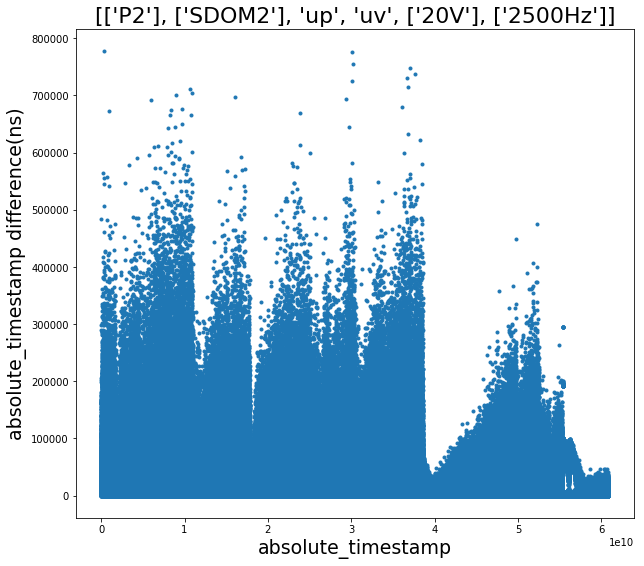

0.14464332391744852


In [253]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = c.P_S_used()

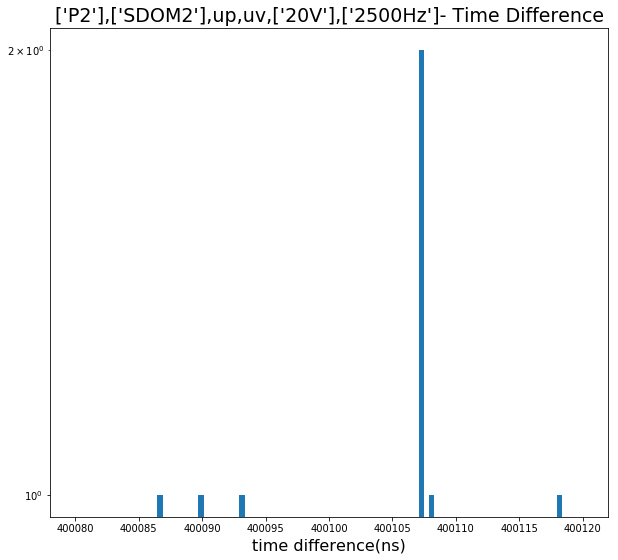

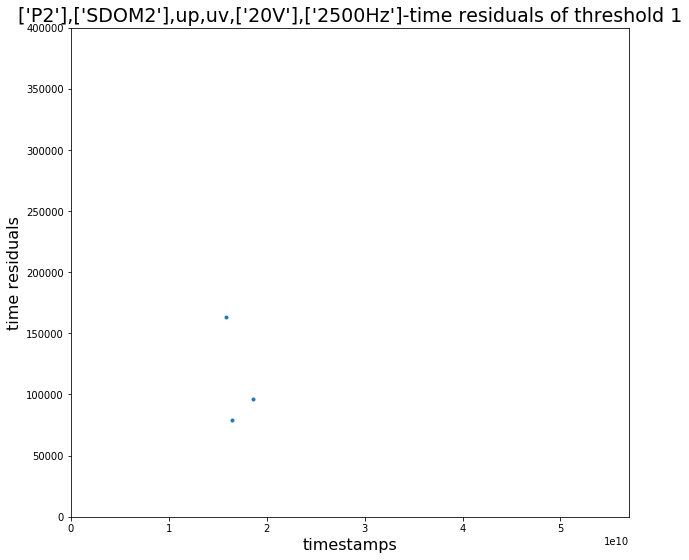

In [254]:
r3 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

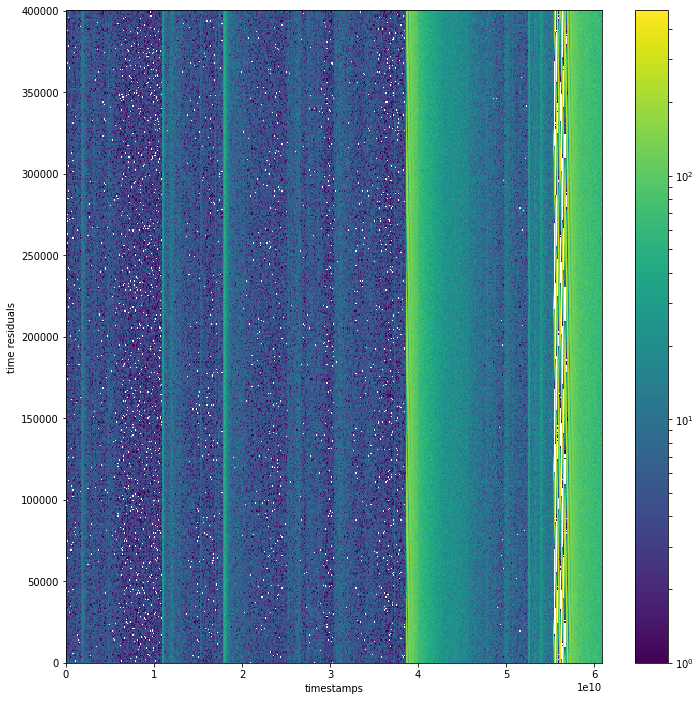

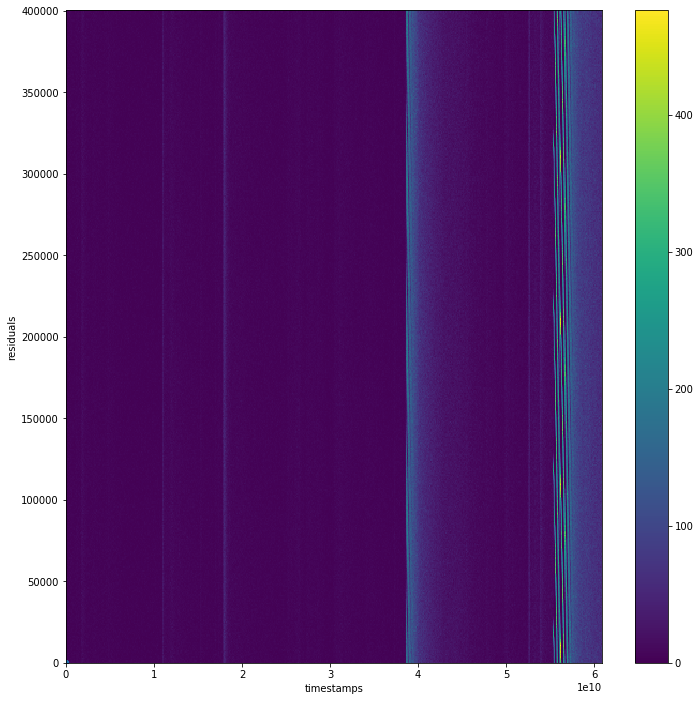

In [255]:
#gaus_peak = r3.GetGausPeak([0.5e10,1.0e10])
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r3.HIST2D(500, gaus_peak, SDOM_num)

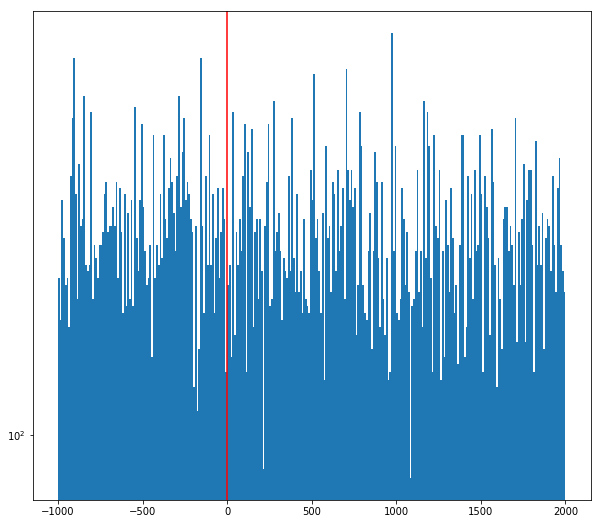

In [262]:
my_slice = abs_elim_3+rising_1_elim_3
weights = r3.weights
my_res = (my_slice%gaus_peak) - 325000-1500+370+10+3+11000+2500

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_res,bins=300,log=True, weights=weights, range=(-1000,2000))
ax.axvline(color='r')
#ax.axvline(10,color='k')
#ax.axvline(-10,color='k')